In [1]:
import tensorflow as tf
#GPU를 사용하도록 설정
tf.debugging.set_log_device_placement(True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
#텐서플로의 객체 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
import numpy as np
np.random.seed(7)
from matplotlib import pyplot as plt

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', tf.keras.__version__)

Python version :  3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
TensorFlow version :  2.4.1
Keras version :  2.4.0


In [3]:
이미지_높이 = 448
이미지_너비 = 304

In [4]:
#0으로 초기화된 배열 생성
# 448 * 304 * 4
학습이미지_하나 = np.zeros((이미지_높이, 이미지_너비, 4), dtype = np.uint8) #<-- 오타 수정

In [5]:
학습이미지_하나.shape

(448, 304, 4)

In [6]:
import glob

targetPattern = "*.npy"
#현재 폴더에서 확장자가 npy인 파일 리스트 리턴
npy_file_name_list = glob.glob(targetPattern)

npy_file_name_list

['198511.npy',
 '200009.npy',
 '199506.npy',
 '200301.npy',
 '201207.npy',
 '199007.npy',
 '198506.npy',
 '200306.npy',
 '201807.npy',
 '201110.npy',
 '197812.npy',
 '199610.npy',
 '199701.npy',
 '198702.npy',
 '200309.npy',
 '199509.npy',
 '198812.npy',
 '200405.npy',
 '198401.npy',
 '200204.npy',
 '200607.npy',
 '201301.npy',
 '198509.npy',
 '200702.npy',
 '201803.npy',
 '199603.npy',
 '200112.npy',
 '199711.npy',
 '200005.npy',
 '199009.npy',
 '200107.npy',
 '200905.npy',
 '198011.npy',
 '198109.npy',
 '198206.npy',
 '199109.npy',
 '201405.npy',
 '200311.npy',
 '201812.npy',
 '197912.npy',
 '201708.npy',
 '199101.npy',
 '199601.npy',
 '200805.npy',
 '199008.npy',
 '200203.npy',
 '201705.npy',
 '201109.npy',
 '199904.npy',
 '200101.npy',
 '197906.npy',
 '199102.npy',
 '198306.npy',
 '199505.npy',
 '199011.npy',
 '199305.npy',
 '200906.npy',
 '199412.npy',
 '201107.npy',
 '201208.npy',
 '201203.npy',
 '198406.npy',
 '201503.npy',
 '199602.npy',
 '198312.npy',
 '200606.npy',
 '200605.n

In [7]:
#확장자가 npy인 파일 리스트를 오름차순 정렬
npy_file_name_list.sort()

In [8]:
npy_file_name_list

['197811.npy',
 '197812.npy',
 '197901.npy',
 '197902.npy',
 '197903.npy',
 '197904.npy',
 '197905.npy',
 '197906.npy',
 '197907.npy',
 '197908.npy',
 '197909.npy',
 '197910.npy',
 '197911.npy',
 '197912.npy',
 '198001.npy',
 '198002.npy',
 '198003.npy',
 '198004.npy',
 '198005.npy',
 '198006.npy',
 '198007.npy',
 '198008.npy',
 '198009.npy',
 '198010.npy',
 '198011.npy',
 '198012.npy',
 '198101.npy',
 '198102.npy',
 '198103.npy',
 '198104.npy',
 '198105.npy',
 '198106.npy',
 '198107.npy',
 '198108.npy',
 '198109.npy',
 '198110.npy',
 '198111.npy',
 '198112.npy',
 '198201.npy',
 '198202.npy',
 '198203.npy',
 '198204.npy',
 '198205.npy',
 '198206.npy',
 '198207.npy',
 '198208.npy',
 '198209.npy',
 '198210.npy',
 '198211.npy',
 '198212.npy',
 '198301.npy',
 '198302.npy',
 '198303.npy',
 '198304.npy',
 '198305.npy',
 '198306.npy',
 '198307.npy',
 '198308.npy',
 '198309.npy',
 '198310.npy',
 '198311.npy',
 '198312.npy',
 '198401.npy',
 '198402.npy',
 '198403.npy',
 '198404.npy',
 '198405.n

In [9]:
import cv2
#전체 학습 이미지가 저장될 리스트
전체_학습이미지_리스트 = []

#npy_file_name_list 에서 파일명 하나를 npy_file에 대입
for npy_file in npy_file_name_list:
  print("npy_file = ", npy_file)
  npy_data = np.load(npy_file)
  #0번째 이미지를 해빙농도 변수에 저장
  해빙농도 = npy_data[: , : , 0]
  #1번째 이미지 북극점 변수에 저장
  북극점 = npy_data[: , : , 1]
  북극점_포함_해빙농도 = 해빙농도+북극점
  #2번째 이미지 해안선 마스크 변수에 저장
  해안선마스크 = npy_data[: , : , 2]
  #3번째 이미지 육지마스크에 대입
  육지마스크 = npy_data[: , : , 3]
  학습이미지_하나 = np.zeros((이미지_높이, 이미지_너비, 4), dtype = np.uint8) #<-- 오타 수정
  #해빙농도, 북극점, 해안마스크, 육지마스크를 하나로 병합
  학습이미지_하나 = cv2.merge((해빙농도, 북극점_포함_해빙농도, 해안선마스크, 육지마스크))
  #학습이미지_하나를 전체_학습이미지_리스트에 추가
  전체_학습이미지_리스트.append(학습이미지_하나)
  print("="*100)

npy_file =  197811.npy
npy_file =  197812.npy
npy_file =  197901.npy
npy_file =  197902.npy
npy_file =  197903.npy
npy_file =  197904.npy
npy_file =  197905.npy
npy_file =  197906.npy
npy_file =  197907.npy
npy_file =  197908.npy
npy_file =  197909.npy
npy_file =  197910.npy
npy_file =  197911.npy
npy_file =  197912.npy
npy_file =  198001.npy
npy_file =  198002.npy
npy_file =  198003.npy
npy_file =  198004.npy
npy_file =  198005.npy
npy_file =  198006.npy
npy_file =  198007.npy
npy_file =  198008.npy
npy_file =  198009.npy
npy_file =  198010.npy
npy_file =  198011.npy
npy_file =  198012.npy
npy_file =  198101.npy
npy_file =  198102.npy
npy_file =  198103.npy
npy_file =  198104.npy
npy_file =  198105.npy
npy_file =  198106.npy
npy_file =  198107.npy
npy_file =  198108.npy
npy_file =  198109.npy
npy_file =  198110.npy
npy_file =  198111.npy
npy_file =  198112.npy
npy_file =  198201.npy
npy_file =  198202.npy
npy_file =  198203.npy
npy_file =  198204.npy
npy_file =  198205.npy
npy_file = 

In [10]:
전체_학습이미지_리스트

[array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        ...,
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8), array([[[0, 0, 0, 0],
         [0, 0, 0, 0

In [11]:
#전체_학습이미지_리스트를 배열로 변환
전체_학습이미지_배열 = np.array ( 전체_학습이미지_리스트)

In [12]:
전체_학습이미지_배열.shape

(482, 448, 304, 4)

In [13]:
X_train_list = []
y_train_list = []
#첫번째 이미지부터 마지막 24개의 이미지(2016년 1월 ~ 2018년 12월)를 제외한 이미지 
for i in range(482-5):
  다섯개이미지_리스트 = []
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+1, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+2, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+3, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+4, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+5, : , : , 1:] )
  X_train_list.append(다섯개이미지_리스트)

  #i+24 번째 이미지  (2년후) 의 0번째 데이터 (해빙농도)를 y_train_list에 추가
  y_train_list.append(전체_학습이미지_배열[i+5, : , : , 0] )

In [14]:
#X_train_list (북극점포함_해빙농도, 해안마스크, 육지마스크) 을 배열로 변환
X_train = np.array(X_train_list)
#y_train_list (해빙농도) 를 배열로 변환
y_train = np.array(y_train_list)

In [15]:
#X_train의 모양 조회
# 448줄 304칸 짜리 3개 이미지 조합이 458개
X_train.shape

(477, 6, 448, 304, 3)

In [16]:
#y_train 모양 조회
#448줄 304칸 의 배열 (해빙농도) 가 458개
y_train.shape

(477, 448, 304)

In [17]:
#y_train.reshape(-1, 448*304 ) : 448줄 304칸의 데이터를 1줄 448*304 칸으로 변환 
y_train = y_train.reshape(-1, 448*304 )

In [18]:
y_train.shape

(477, 136192)

In [19]:
X_test_list = []
y_test_list = []
#전체 학습이미지 482개중 
#482-24 (2017년 1월) 부터 482-12 (2018년 12월) 까지 반복
for i in range(482-(24+5),482-5):
  print("i=",i)
  다섯개이미지_리스트 = []
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+1, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+2, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+3, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+4, : , : , 1:] )
  다섯개이미지_리스트.append( 전체_학습이미지_배열[i+5, : , : , 1:] )
  X_test_list.append(다섯개이미지_리스트)

  #2017년 1월 ~ 2018년 12월의 진짜 이미지 (해빙농도) 를 y_test_list에 추가
  y_test_list.append( 전체_학습이미지_배열[i+5, : , : , 0] )

i= 453
i= 454
i= 455
i= 456
i= 457
i= 458
i= 459
i= 460
i= 461
i= 462
i= 463
i= 464
i= 465
i= 466
i= 467
i= 468
i= 469
i= 470
i= 471
i= 472
i= 473
i= 474
i= 475
i= 476


In [20]:
#X_test_list를 배열로 변환
X_test = np.array(X_test_list)

In [21]:
#X_test의 모양 조회
#448줄 304칸 이미지 3개 조합(북극점 포함 해빙농도, 해안마스크,육지마스크)이 12개
X_test.shape

(24, 6, 448, 304, 3)

In [22]:
#y_test_list를 배열로 변환
y_test = np.array(y_test_list)

In [23]:
#y_test 의 모양 조회
#448줄 304칸 이미지 (해빙농도) 12개
y_test.shape

(24, 448, 304)

In [24]:
#y_test.reshape(-1, 448*304) : 448칸 304줄의 데이터를 1칸 448*304칸으로 수정
y_test = y_test.reshape(-1, 448*304)

In [25]:
y_test.shape

(24, 136192)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, LSTM, ConvLSTM2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers.convolutional import Conv3D,Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Dense, Activation
from keras.layers import Reshape, Lambda
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg19 import VGG19

num_classes = 448*304
main_input = Input(shape=(6, 이미지_높이,이미지_너비,3))
input_shape = (이미지_높이, 이미지_너비, 3)

#cnn layer
cnn = Sequential()

#conv1-1,1-2
cnn.add(Conv2D(filters=128, kernel_size=(5,5), strides = (5,5), padding="same", activation="relu",input_shape=input_shape))
cnn.add(Conv2D(filters=128, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
#MAXPOOL1
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

#conv2-1, 2-2
cnn.add(Conv2D(filters=128, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
cnn.add(Conv2D(filters=128, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
#MAXPOOL2
cnn.add(MaxPooling2D(pool_size=(2, 2)))


#conv3-1, 3-2, 3-3
cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
#MAXPOOL3
cnn.add(MaxPooling2D(pool_size=(2, 2)))

#conv4-1, 4-2, 4-3
cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
#MAXPOOL4
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

#conv5-1, 5-2, 5-3
cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides = 1, padding="same", activation="relu"))
#MAXPOOL5
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

#rnn layer
rnn = Sequential()
rnn = LSTM(150, return_sequences=False, input_shape=(이미지_높이,이미지_너비))

#dense layer
dense = Sequential()
dense.add(Dense(2000, activation='relu'))
dense.add(Dropout(0.25))
dense.add(Dense(2000, activation='relu'))
dense.add(Dropout(0.25))
dense.add(Dense(num_classes, activation='relu'))

#model combination
model = TimeDistributed(cnn)(main_input) # this should make the cnn 'run' 6 times?
model = rnn(model) # combine timedistributed cnn with rnn
model = dense(model) # add dense

final_model = Model(inputs=main_input, outputs=model)
print(final_model.summary())

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
#Mean Squared Error 를 계산해서 오차가최소화 되는 모델을 만들꺼임
final_model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=1e-4), 
              metrics=[tf.keras.metrics.MeanSquaredError()]
              )
callbacks = EarlyStopping(monitor='mean_squared_error', patience=10)

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhos

In [29]:
hist = final_model.fit(X_train, y_train, batch_size=20, epochs=300, shuffle=True, callbacks=[callbacks])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
24/24 [==============================] - 7s 292ms/step - loss: 202.5524 - mean_squared_error: 202.5524
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 135/300
Executing op __inference_train_function_4496 in device /job:localhost/replica:0/task:0/device:GPU:0
24/24 [==============================] - 7s 295ms/step - loss: 200.0957 - mean_squared_error: 200.0957
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:loca

In [30]:
#final_model.save('cnn+lstm(6,128)model.h5')
#new_model = keras.models.load_model('my_model.h5')

In [31]:
y_predict = final_model.predict(X_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [32]:
#2019년 1월~ 2020년 12월 해빙농도
y_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
#2018년 1월 진짜 해빙농도
y_test[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [34]:
#1줄 448*304칸의 2018년 1월 예측 해빙이미지(y_predict[0])를 448줄 304칸으로 변환해서
#예측0_이미지에 대입
예측0_이미지 = y_predict[0].reshape(448, 304)

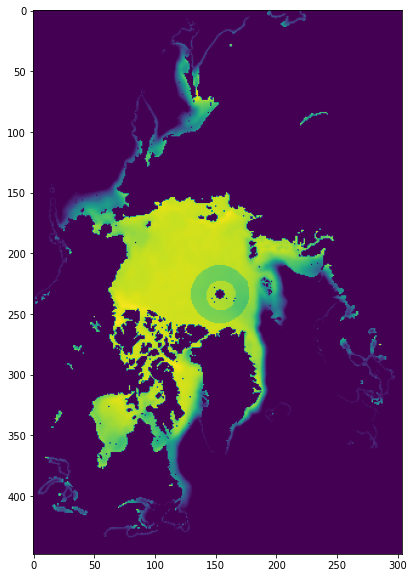

In [35]:
#2018년 1월 예측한 해빙농도 출력
plt.figure(figsize=(15,10))

plt.imshow(예측0_이미지)

In [36]:
#1줄 448*304칸 2018년 1월 진짜 해빙이미지 (y_test[0]) 를 448줄 304칸으로
#변환해서 진짜0_이미지 에 저장
진짜0_이미지 = y_test[0].reshape(448, 304)

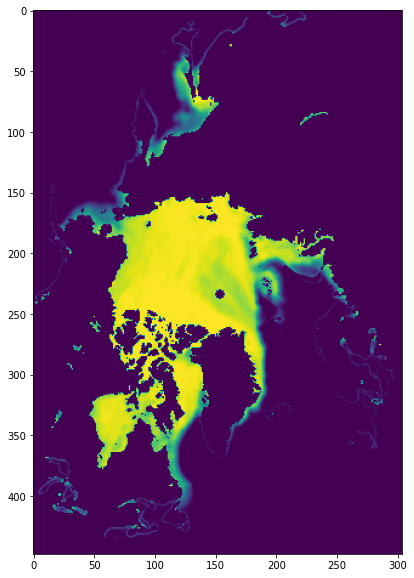

In [37]:
#2018년 1월 진짜 해빙농도 출력
plt.figure(figsize=(15,10))

plt.imshow(진짜0_이미지)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
#Mean Squared Error
mean_squared_error(y_test, y_predict)

168.40082

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
#Mean Absolute Error
mean_absolute_error(y_test, y_predict)

3.2034864

In [42]:
y_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
y_predict.shape

(24, 136192)

In [44]:
import pandas as pd

df = pd.DataFrame(y_predict)

In [45]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# train set 마지막 2년 날짜 생성
month = list()

for i in range(1, 13):
    month.append('2019-%02d' % i)

for i in range(1, 13):
    month.append('2020-%02d' % i)

In [47]:
month

['2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

In [48]:
df.insert(0, 'month', month, True)

In [49]:
df

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,2019-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2019-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2019-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2019-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.to_csv("submission4.csv",index=False)